# Modelos Avanzados de Machine Learning

## Modelos de Ensamble
### Random Forest 

Ejemplo  completo de clasificación con **Random Forest** usando el dataset de Iris. Incluye entrenamiento, evaluación y análisis de la importancia de características.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# 1. Cargar datos
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Crear y entrenar modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 4. Predicción y evaluación
y_pred = modelo.predict(X_test)

print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Matriz de Confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



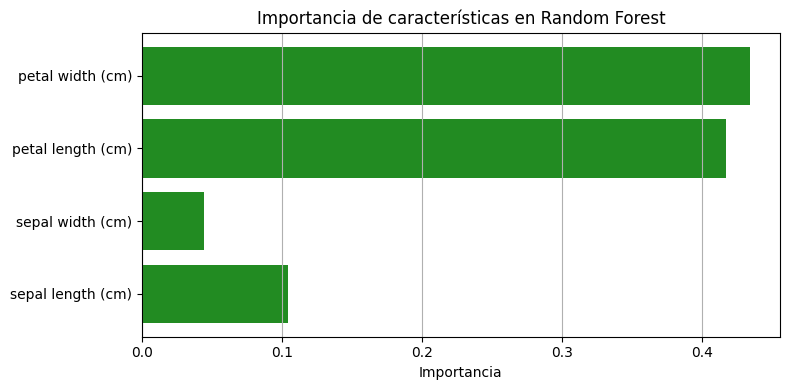

In [2]:
# 5. Importancia de características
importancias = modelo.feature_importances_
features = X.columns

# Visualizar
plt.figure(figsize=(8, 4))
plt.barh(features, importancias, color='forestgreen')
plt.xlabel("Importancia")
plt.title("Importancia de características en Random Forest")
plt.grid(axis='x')
plt.tight_layout()
plt.show() 

### XGBoost 

Ejemplo de XGBoost usando el dataset Iris, incluyendo entrenamiento, evaluación y análisis de la importancia de las cracterísticas. 

In [4]:
%pip install xgboost 

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/150.0 MB 13.9 MB/s eta 0:00:11
   - -------------------------------------- 4.2/150.0 MB 12.6 MB/s eta 0:00:12
   - -------------------------------------- 6.3/150.0 MB 11.7 MB/s eta 0:00:13
   -- ------------------------------------- 8.4/150.0 MB 11.5 MB/s eta 0:00:13
   -- ------------------------------------- 11.0/150.0 MB 11.5 MB/s eta 0:00:13
   --- ------------------------------------ 13.4/150.0 MB 11.5 MB/s eta 0:00:12
   ---- ----------------------------------- 15.5/150.0 MB 11.6 MB/s eta 0:00:12
   ---- ----------------------------------- 17.6/150.0 MB 11.4 MB/s eta 0:00:12
   ----- ---------------------------------- 20.4/150.0 MB 11.4 MB/s eta 0:00:12
   ------ --------------------------------- 23.1/150.0 MB 11.3 MB/s eta 0:00:12
   ------ --------------------------------- 25.7/150.0 MB 11.4 MB/s eta 0:00:11
   ------- -------------------------------- 28.0/150.

In [3]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# 1. Cargar datos
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Crear y entrenar modelo XGBoost
modelo = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=3,
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="mlogloss",
)

modelo.fit(X_train, y_train)

# 4. Evaluar el modelo
y_pred = modelo.predict(X_test)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print(
    "\nReporte de Clasificación:\n",
    classification_report(y_test, y_pred, target_names=iris.target_names),
)

Matriz de Confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



c:\Users\Personal\anaconda3\envs\iacourse\lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Visualización de importancia de características

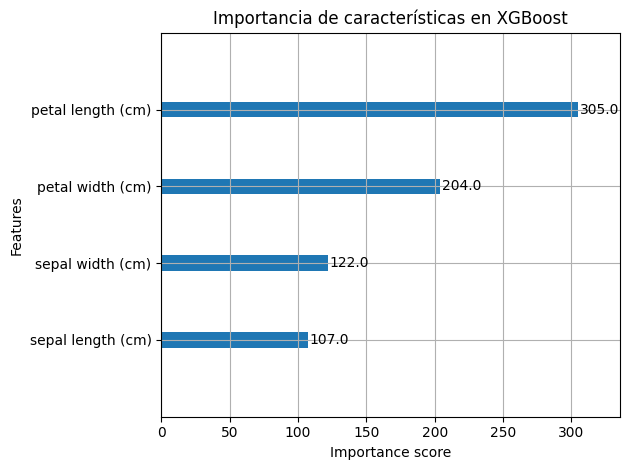

In [4]:
# 5. Importancia de variables
xgb.plot_importance(modelo)
plt.title("Importancia de características en XGBoost")
plt.tight_layout()
plt.show() 

## AutoML 

### TPOT: Tree-based Pipeline Optimization Tool 

1. Primero debe isntalarse la librería

In [3]:
%pip install tpot

Note: you may need to restart the kernel to use updated packages.


2. Ejemplo de clasificación del dataset Iris con TPOT

In [5]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Cargar el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear instancia TPOTClassifier (sin error)
tpot = TPOTClassifier(generations=5, population_size=20, random_state=42)

# Entrenar
tpot.fit(X_train, y_train)

# Evaluar
y_pred = tpot.predict(X_test)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Mejor pipeline
mejor_pipeline = tpot.fitted_pipeline_
y_pred = mejor_pipeline.predict(X_test)
print(mejor_pipeline)

c:\Users\Personal\anaconda3\envs\iacourse\lib\site-packages\tpot\tpot_estimator\estimator.py:456: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
Generation: 100%|██████████| 5/5 [01:54<00:00, 22.89s/it]
c:\Users\Personal\anaconda3\envs\iacourse\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Personal\anaconda3\envs\iacourse\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\Personal\anaconda3\envs\iacourse\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Pipeline(steps=[('normalizer', Normalizer(norm='max')),
                ('selectpercentile',
                 SelectPercentile(percentile=87.4306730968204)),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transformer_list=[('zerocount',
                                                                                 ZeroCount())])),
                                                ('passthrough',
                                                 Passthrough())])),
         

### PyCaret 

1. Instalación en el entorno. Preferiblemente un entorno virtual limpio. 

In [1]:
%pip install pycaret

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.6-py3-none-any.whl.metadata (2.4 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyod-2.0.4.tar.gz (169 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
  Using cached plotly-6.0.1-py3-none-any.whl.metadata (6.7 kB)


In [1]:
from pycaret.datasets import get_data
from pycaret.classification import *

# 1. Cargar el dataset Iris
iris = get_data('iris')

# 2. Configurar el entorno de PyCaret (setup)
# Se define 'species' como la variable objetivo
exp = setup(data=iris, target='species', session_id=42, verbose=False)

# 3. Comparar automáticamente múltiples modelos
best_model = compare_models()

# 4. Evaluar el mejor modelo
evaluate_model(best_model)

# 5. Predecir sobre nuevos datos
predictions = predict_model(best_model)
print(predictions.head()) 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9809,0.0000,0.9809,0.9852,0.9805,0.9711,0.9735,0.0070
nb,Naive Bayes,0.9727,0.9974,0.9727,0.9806,0.9714,0.9588,0.9638,0.0080
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0100
et,Extra Trees Classifier,0.9718,1.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0400
lr,Logistic Regression,0.9618,0.0000,0.9618,0.9705,0.9610,0.9422,0.9470,0.5480
ada,Ada Boost Classifier,0.9618,0.0000,0.9618,0.9705,0.9610,0.9422,0.9470,0.0230
knn,K Neighbors Classifier,0.9527,0.9888,0.9527,0.9595,0.9520,0.9284,0.9322,0.3370
rf,Random Forest Classifier,0.9518,0.9951,0.9518,0.9660,0.9487,0.9270,0.9352,0.0450
gbc,Gradient Boosting Classifier,0.9518,0.0000,0.9518,0.9660,0.9487,0.9270,0.9352,0.0500
lightgbm,Light Gradient Boosting Machine,0.9427,0.9713,0.9427,0.9520,0.9417,0.9133,0.9183,0.0630


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9778,1.0000,0.9778,0.9792,0.9778,0.9667,0.9674


     sepal_length  sepal_width  petal_length  petal_width          species  \
107           7.3          2.9           6.3          1.8   Iris-virginica   
63            6.1          2.9           4.7          1.4  Iris-versicolor   
133           6.3          2.8           5.1          1.5   Iris-virginica   
56            6.3          3.3           4.7          1.6  Iris-versicolor   
127           6.1          3.0           4.9          1.8   Iris-virginica   

    prediction_label  prediction_score  
107   Iris-virginica            0.9998  
63   Iris-versicolor            0.9923  
133  Iris-versicolor            0.7679  
56   Iris-versicolor            0.9913  
127   Iris-virginica            0.8300  


Se puede exportar el modelo: 

In [2]:
save_model(best_model, 'mejor_modelo_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                        

Y se puede cargar nuevamente en una variable: 

In [3]:
modelo = load_model('mejor_modelo_pycaret') 

Transformation Pipeline and Model Successfully Loaded
